In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from src.data import carga_pos_spacy

sns.set(style="whitegrid")

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
df = carga_pos_spacy()
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")




Dataset shape: (7935, 7)
Columns: ['Song', 'Song year', 'Artist', 'Genre', 'Lyrics', 'tokens', 'pos_tags_spacy']


# 3. Data Preparation


In [4]:
df["Song year"] = df["Song year"].astype(int)

df["decade"] = (df["Song year"] // 10) * 10

df["pos_tags_spacy"] = df["pos_tags_spacy"].apply(ast.literal_eval)

df[["Song year", "decade"]].head()


,Song year,decade
0,2005,2000
1,2012,2010
2,2013,2010
3,2007,2000
4,2012,2010


# 4. Ingeniería de características

In [5]:


# Song length
df["song_length"] = df["pos_tags_spacy"].apply(len)

# Type-Token Ratio
def type_token_ratio(pos_list):
    tokens = [t[0].lower() for t in pos_list]
    return len(set(tokens)) / len(tokens) if len(tokens) > 0 else 0

df["ttr"] = df["pos_tags_spacy"].apply(type_token_ratio)

# POS density function
def pos_density(pos_list, tag):
    total = len(pos_list)
    count = sum(1 for t in pos_list if t[1] == tag)
    return count / total if total > 0 else 0

df["noun_density"] = df["pos_tags_spacy"].apply(lambda x: pos_density(x, "NOUN"))
df["verb_density"] = df["pos_tags_spacy"].apply(lambda x: pos_density(x, "VERB"))
df["adj_density"]  = df["pos_tags_spacy"].apply(lambda x: pos_density(x, "ADJ"))
df["pron_density"] = df["pos_tags_spacy"].apply(lambda x: pos_density(x, "PRON"))
df["aux_density"]  = df["pos_tags_spacy"].apply(lambda x: pos_density(x, "AUX"))
df["sconj_density"]= df["pos_tags_spacy"].apply(lambda x: pos_density(x, "SCONJ"))

# Noun/Verb ratio
df["noun_verb_ratio"] = df["noun_density"] / df["verb_density"]

df.head()



,Song,Song year,Artist,Genre,Lyrics,tokens,pos_tags_spacy,decade,song_length,ttr,noun_density,verb_density,adj_density,pron_density,aux_density,sconj_density,noun_verb_ratio
0,craftsmanship,2005,buck-65,Hip-Hop,Most folks spend their days daydreaming of fin...,"['Most', 'folks', 'spend', 'their', 'days', 'd...","[(Most, ADJ, JJS, Most), (folks, NOUN, NNS, fo...",2000,427,0.505855,0.185012,0.163934,0.074941,0.156909,0.072600,0.023419,1.128571
1,come-on-out,2012,the-elwins,Indie,Take your cold hands and put them on my face S...,"['Take', 'your', 'cold', 'hands', 'and', 'put'...","[(Take, VERB, VB, take), (your, PRON, PRP$, yo...",2010,293,0.409556,0.136519,0.225256,0.054608,0.218430,0.068259,0.034130,0.606061
2,riot,2013,bullet-for-my-valentine,Metal,Are you ready its time for war Well break down...,"['Are', 'you', 'ready', 'its', 'time', 'for', ...","[(Are, AUX, VBP, be), (you, PRON, PRP, you), (...",2010,204,0.323529,0.137255,0.196078,0.024510,0.107843,0.039216,0.009804,0.700000
3,that-s-what-girls-do,2007,dream-street,Pop,You ask me why I change the color of my hair Y...,"['You', 'ask', 'me', 'why', 'I', 'change', 'th...","[(You, PRON, PRP, you), (ask, VERB, VBP, ask),...",2000,229,0.366812,0.117904,0.205240,0.061135,0.275109,0.043668,0.021834,0.574468
4,believe-in-a-dollar,2012,cassidy,Hip-Hop,Do you believe in magic in a young girls heart...,"['Do', 'you', 'believe', 'in', 'magic', 'in', ...","[(Do, AUX, VBP, do), (you, PRON, PRP, you), (b...",2010,249,0.421687,0.192771,0.148594,0.040161,0.160643,0.072289,0.044177,1.297297


# 5. Aggregation por año

In [6]:

# 5. Aggregation by Year


yearly_metrics = df.groupby("Song year")[[
    "song_length",
    "ttr",
    "noun_density",
    "verb_density",
    "noun_verb_ratio"
]].mean()

yearly_metrics.head()




,song_length,ttr,noun_density,verb_density,noun_verb_ratio
Song year,,,,,
1970,121.000000,0.583640,0.154471,0.130945,1.228261
1971,264.500000,0.421404,0.161909,0.171228,1.111980
1972,202.363636,0.394358,0.131156,0.165443,0.873583
1973,194.375000,0.403571,0.140369,0.163608,0.941590
1974,246.000000,0.491107,0.174967,0.156061,1.227899


# 6. Aggregation por decada

In [7]:




decade_metrics = df.groupby("decade")[[
    "song_length",
    "ttr",
    "noun_density",
    "verb_density",
    "noun_verb_ratio"
]].mean()

decade_metrics


,song_length,ttr,noun_density,verb_density,noun_verb_ratio
decade,,,,,
1970,209.510204,0.443552,0.160078,0.163072,1.096945
1980,210.510638,0.451508,0.162481,0.170057,1.042964
1990,203.423810,0.470134,0.162169,0.162411,1.108623
2000,246.454846,0.466402,0.164413,0.169425,1.085531
2010,272.223790,0.415443,0.152924,0.174454,inf


# 7. Song Length Evolution

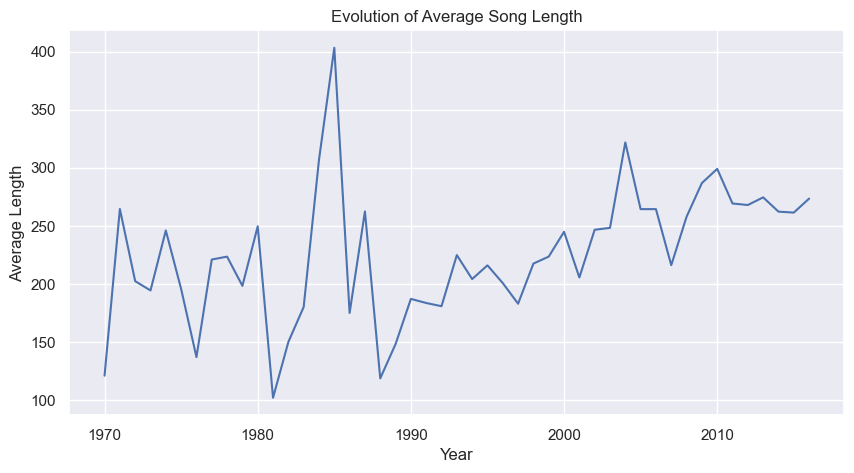

In [8]:
plt.figure(figsize=(10,5))
yearly_metrics["song_length"].plot()
plt.title("Evolution of Average Song Length")
plt.xlabel("Year")
plt.ylabel("Average Length")
plt.show()


# 8. Lexical Diversity Evolution

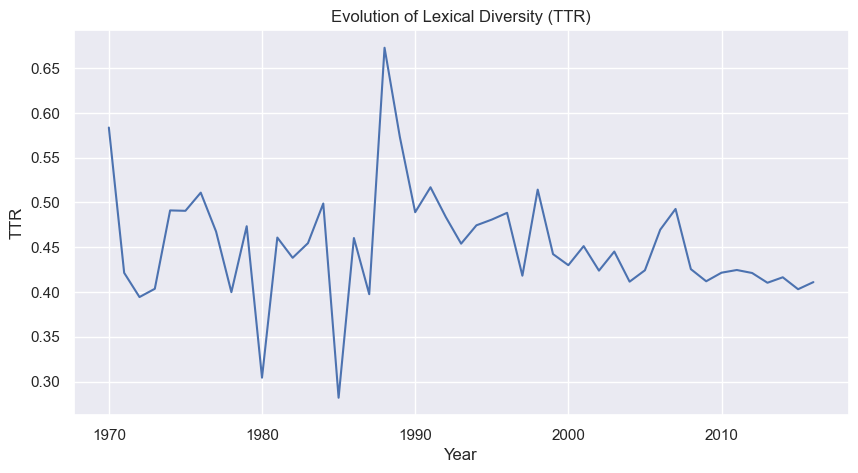

In [9]:
plt.figure(figsize=(10,5))
yearly_metrics["ttr"].plot()
plt.title("Evolution of Lexical Diversity (TTR)")
plt.xlabel("Year")
plt.ylabel("TTR")
plt.show()


# 9. POS Density Evolution

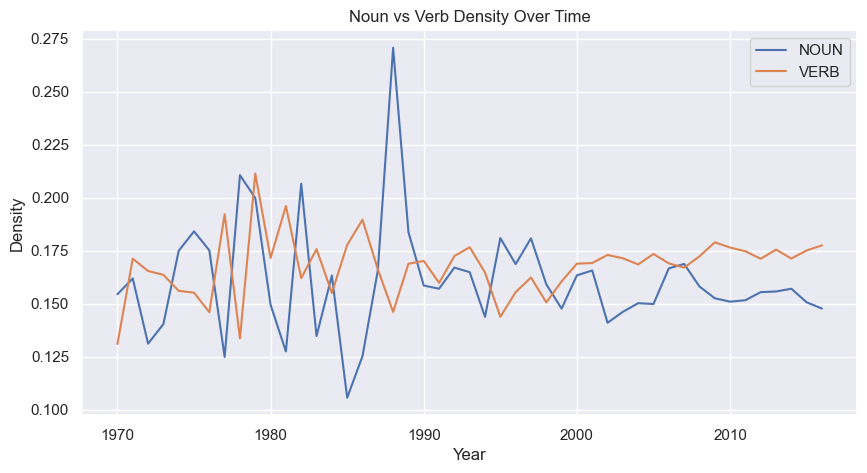

In [10]:
plt.figure(figsize=(10,5))
yearly_metrics["noun_density"].plot(label="NOUN")
yearly_metrics["verb_density"].plot(label="VERB")

plt.legend()
plt.title("Noun vs Verb Density Over Time")
plt.xlabel("Year")
plt.ylabel("Density")
plt.show()


# 10. Rolling Average

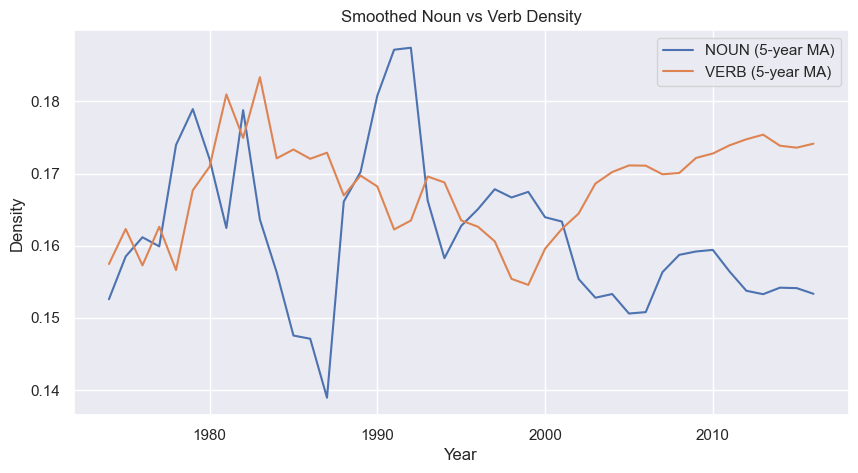

In [11]:
rolling_noun = yearly_metrics["noun_density"].rolling(window=5).mean()
rolling_verb = yearly_metrics["verb_density"].rolling(window=5).mean()

plt.figure(figsize=(10,5))
rolling_noun.plot(label="NOUN (5-year MA)")
rolling_verb.plot(label="VERB (5-year MA)")

plt.legend()
plt.title("Smoothed Noun vs Verb Density")
plt.xlabel("Year")
plt.ylabel("Density")
plt.show()
